In [1]:
#import modules
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import random
from tqdm.notebook import tqdm as log_progress

SPELLS_DIR = "Spells/"

IMG_SIZE = 90

#add some noise to the images (AKA random circles)
VARIANT_COUNT = 80
MAX_CIRCLE_SIZE = 4
MAX_CIRCLE_COUNT = 5

In [3]:
spells = {}
Y = []

for spell in glob.glob(SPELLS_DIR + "*.png"):
    spell_name = spell.split("\\")[-1]
    spell_name = spell_name.split(".")[0]
    spell_name = spell_name.split(" ")[0]
    
    if not spell_name in spells:
        spells[spell_name] = []
    
    image = cv2.imread(spell, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE), cv2.INTER_AREA)
    spells[spell_name].append(image)

NUM_SPELLS = len(spells)

X = []

counter = 0
for spell in spells:
    for var in spells[spell]:
        X.append(var)
        Y.append(counter)
        
        for i in range(VARIANT_COUNT):
            variant = var.copy()
            circles = random.randrange(1, MAX_CIRCLE_COUNT)
            for j in range(circles):
                variant = cv2.circle(variant, (random.randrange(0, IMG_SIZE), random.randrange(0, IMG_SIZE)), random.randrange(1, MAX_CIRCLE_SIZE), (255, 255, 255), -1)
            X.append(variant)
            Y.append(counter)
            
    counter += 1
    
X = np.array(X, dtype='float32')
X = np.reshape(X, (X.shape[0], IMG_SIZE, IMG_SIZE, 1))
Y = to_categorical(Y)

print(X.shape)
print(Y.shape)

(9477, 90, 90, 1)
(9477, 13)


In [18]:
#create model
model = Sequential()

model.add(Conv2D(64, input_shape=(IMG_SIZE, IMG_SIZE, 1), kernel_size=(2,2), strides=(2,2), padding='same', activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=(2,2), strides=(4,4), padding='same', activation='relu'))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(NUM_SPELLS, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 45, 45, 64)        320       
                                                                 
 dropout (Dropout)           (None, 45, 45, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        8224      
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 16)                73744     
                                                                 
 dropout_2 (Dropout)         (None, 16)                0

Epoch 1/10
3159/3159 [==============================] - 23s 5ms/step - loss: 0.5939 - accuracy: 0.8297
Epoch 2/10
3159/3159 [==============================] - 16s 5ms/step - loss: 0.1196 - accuracy: 0.9675
Epoch 3/10
3159/3159 [==============================] - 17s 5ms/step - loss: 0.0969 - accuracy: 0.9720
Epoch 4/10
3159/3159 [==============================] - 18s 6ms/step - loss: 0.0660 - accuracy: 0.9793
Epoch 5/10
3159/3159 [==============================] - 18s 6ms/step - loss: 0.0600 - accuracy: 0.9835
Epoch 6/10
3159/3159 [==============================] - 17s 6ms/step - loss: 0.0572 - accuracy: 0.9831
Epoch 7/10
3159/3159 [==============================] - 18s 6ms/step - loss: 0.0333 - accuracy: 0.9898
Epoch 8/10
3159/3159 [==============================] - 18s 6ms/step - loss: 0.0456 - accuracy: 0.9881
Epoch 9/10
3159/3159 [==============================] - 18s 6ms/step - loss: 0.0420 - accuracy: 0.9894
Epoch 10/10
3159/3159 [==============================] - 17s 5ms/step - l

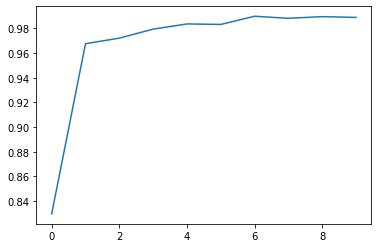

In [19]:
#train model
hist = model.fit(X, Y, epochs=10, batch_size=3, verbose=1)
plt.plot(hist.history['accuracy'])

model.save("SpellAI.h5")

0


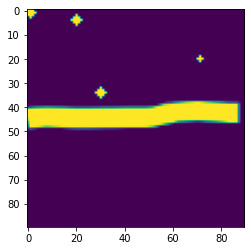

In [5]:
test = 100
model = load_model("SpellAI.h5")
pred = model.predict(X[test:test+1], verbose=0)
plt.imshow(X[test])
print(pred[0].argmax())

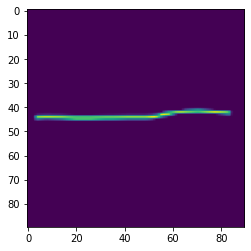

0


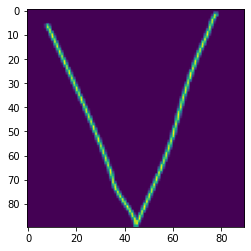

1


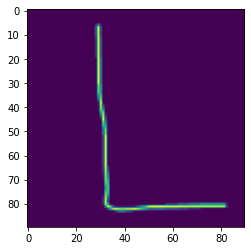

2


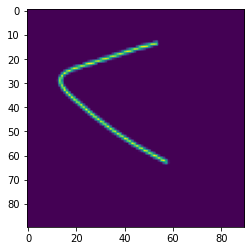

3


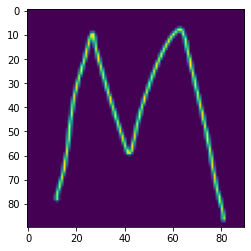

4


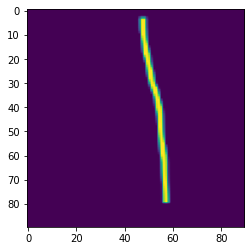

5


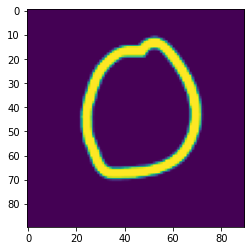

6


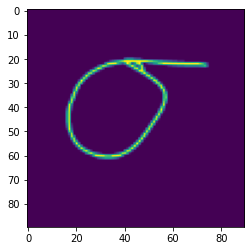

7


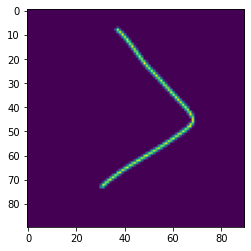

8


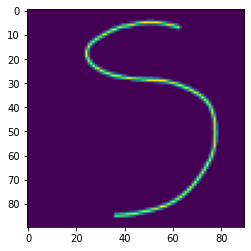

9


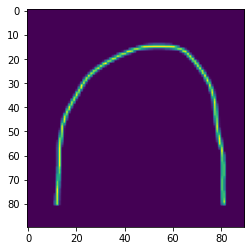

10


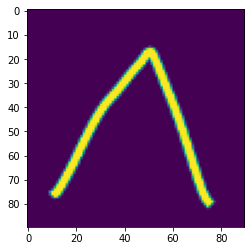

11


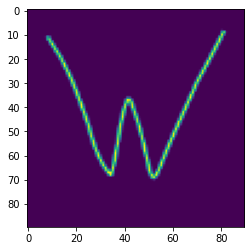

12


In [6]:
last = -1
for i in range(Y.shape[0]):
    if Y[i].argmax() != last:
        plt.imshow(X[i])
        plt.show()
        last+=1
        print(last)